In [12]:
import pandas as pd 
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\wxzha\AppData\Roaming\nltk_data...


True

In [2]:
data_directory = 'C:/Users/wxzha/Downloads/python/Tweets.csv'

In [3]:
tweets = pd.read_csv(data_directory)
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14,NaN,Pacific Time (US & Canada)


In [4]:
tweets.shape

(14640, 15)

In [8]:
# show tweets' percentage by airlines
perc_airlines = tweets.airline.value_counts()/tweets.shape[0]
print(perc_airlines)

United            0.261066
US Airways        0.198975
American          0.188456
Southwest         0.165301
Delta             0.151776
Virgin America    0.034426
Name: airline, dtype: float64


array([<AxesSubplot:ylabel='airline'>], dtype=object)

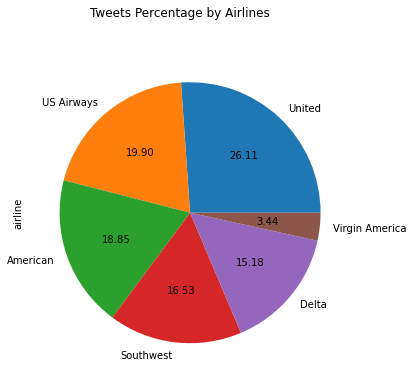

In [23]:
# show in pie
perc_airlines.plot.pie(subplots=True, figsize=(11, 6),autopct='%.2f',title='Tweets Percentage by Airlines' )

In [13]:
# Sentiment analysis
sia = SentimentIntensityAnalyzer()

In [15]:
tweets['sia'] = tweets['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [16]:
tweets.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sia
0,5.703060e+17,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35,NaN,Eastern Time (US & Canada),0.0000
1,5.703010e+17,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15,NaN,Pacific Time (US & Canada),0.0000
2,5.703010e+17,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15,Lets Play,Central Time (US & Canada),0.0000
3,5.703010e+17,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15,NaN,Pacific Time (US & Canada),-0.5984
4,5.703010e+17,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14,NaN,Pacific Time (US & Canada),-0.5829


In [18]:
# the average sia of airlines
sia_by_airlines = tweets.groupby(['airline']).sia.mean()
print(sia_by_airlines)

airline
American          0.012968
Delta             0.124660
Southwest         0.136196
US Airways       -0.022484
United            0.031115
Virgin America    0.143394
Name: sia, dtype: float64


<AxesSubplot:xlabel='airline'>

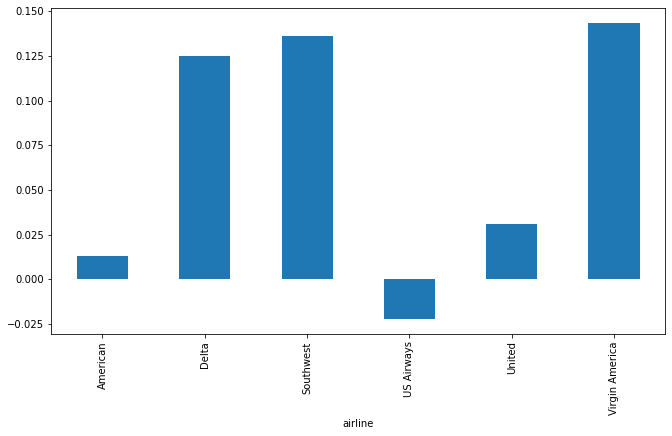

In [28]:
# in graph
sia_by_airlines.plot.bar(figsize=(11, 6))

In [ ]:
tweets1 = tweets.